In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer
from pydataset import data
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

import wrangle
import env
import explore
import feature_engineering
import one_hot_encoder

<div class="alert alert-block alert-info"> 1. Load the tips dataset.
> a. Create a column named price_per_person. This should be the total bill divided by the party size.

> b. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

> c. Use Select K Best to select the top 2 features for predicting tip amount. What are they?

> d. Use Recursive Feature Elimination to select the top 2 features for tip amount. What are they?

> e. Why do you think Select K Best and Recursive Feature Elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?

2. Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

3. Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top n features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

4. Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both Select K Best and Recursive Feature Elimination (use the functions you just built to help you out).

## 1. Load the tips dataset.

> ### <b> a. Create a column named price_per_person. This should be the total bill divided by the party size. </b>

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


> ### <div class="alert alert-block alert-info"> 1. a. Create a column named price_per_person. This should be the total bill divided by the party size.

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# cat_cols = ['sex', 'smoker', 'day', 'time']
df = one_hot_encoder.one_hot_encoder(tips)
df

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,27.18,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,22.67,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,17.82,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [8]:
df.corr()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
total_bill,1.000000,0.675734,0.598315,-0.144877,0.144877,-0.085721,0.085721,-0.086168,0.054919,0.122953,-0.138174,0.183118,-0.183118
tip,0.675734,1.000000,0.489299,-0.088862,0.088862,-0.005929,0.005929,-0.055463,-0.002790,0.125114,-0.095879,0.121629,-0.121629
size,0.598315,0.489299,1.000000,-0.086195,0.086195,0.133178,-0.133178,-0.142184,-0.041121,0.193054,-0.072598,0.103411,-0.103411
sex_Female,-0.144877,-0.088862,-0.086195,1.000000,-1.000000,0.002816,-0.002816,0.071060,-0.053957,-0.168106,0.194445,-0.205231,0.205231
sex_Male,0.144877,0.088862,0.086195,-1.000000,1.000000,-0.002816,0.002816,-0.071060,0.053957,0.168106,-0.194445,0.205231,-0.205231
smoker_No,-0.085721,-0.005929,0.133178,0.002816,-0.002816,1.000000,-1.000000,-0.244316,-0.155744,0.181624,0.128534,-0.054921,0.054921
smoker_Yes,0.085721,0.005929,-0.133178,-0.002816,0.002816,-1.000000,1.000000,0.244316,0.155744,-0.181624,-0.128534,0.054921,-0.054921
day_Fri,-0.086168,-0.055463,-0.142184,0.071060,-0.071060,-0.244316,0.244316,1.000000,-0.216319,-0.195451,-0.169608,-0.058159,0.058159
day_Sat,0.054919,-0.002790,-0.041121,-0.053957,0.053957,-0.155744,0.155744,-0.216319,1.000000,-0.500682,-0.434480,0.462709,-0.462709
day_Sun,0.122953,0.125114,0.193054,-0.168106,0.168106,0.181624,-0.181624,-0.195451,-0.500682,1.000000,-0.392566,0.418071,-0.418071


In [148]:
# Creating new column named 'price_per_person' from dividing total_bill and size
tips['price_per_person'] = round(tips['total_bill'] / tips['size'], 2)

In [149]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15


In [150]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   total_bill        244 non-null    float64 
 1   tip               244 non-null    float64 
 2   sex               244 non-null    category
 3   smoker            244 non-null    category
 4   day               244 non-null    category
 5   time              244 non-null    category
 6   size              244 non-null    int64   
 7   price_per_person  244 non-null    float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 9.3 KB


In [151]:
env.check_columns(tips)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,total_bill,229,"[16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.77, 26.88, 15.04, 14.78, 10.27, 35.26, 15...",0,0.0,float64
1,tip,123,"[1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2.0, 3.12, 1.96, 3.23, 1.71, 5.0, 1.57, 3.0, 3.02,...",0,0.0,float64
2,sex,2,"['Female', 'Male'] Categories (2, object): ['Male', 'Female']",0,0.0,category
3,smoker,2,"['No', 'Yes'] Categories (2, object): ['Yes', 'No']",0,0.0,category
4,day,4,"['Sun', 'Sat', 'Thur', 'Fri'] Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']",0,0.0,category
5,time,2,"['Dinner', 'Lunch'] Categories (2, object): ['Lunch', 'Dinner']",0,0.0,category
6,size,6,"[2, 3, 4, 1, 6, 5]",0,0.0,int64
7,price_per_person,217,"[8.49, 3.45, 7.0, 11.84, 6.15, 6.32, 4.38, 6.72, 7.52, 7.39, 5.14, 8.82, 7.71, 4.61, 7...",0,0.0,float64


In [152]:
def category_cols(df):
    cat_cols = df.select_dtypes(include = ['category']).columns.tolist()
    
    return cat_cols

def continuous_cols(df):
    num_cols = df.select_dtypes(exclude = ['category']).columns.tolist()
    
    return num_cols

In [153]:
cat_cols = category_cols(tips)
cat_cols

['sex', 'smoker', 'day', 'time']

In [154]:
cont_cols = continuous_cols(tips)
cont_cols

['total_bill', 'tip', 'size', 'price_per_person']

> ### <div class="alert alert-block alert-info"> 1.b. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

#### <div class="alert alert-block alert-success"> Answer: I think the total_bill, size, and price_per_person column is a main features that would be important in predicting the tip amount

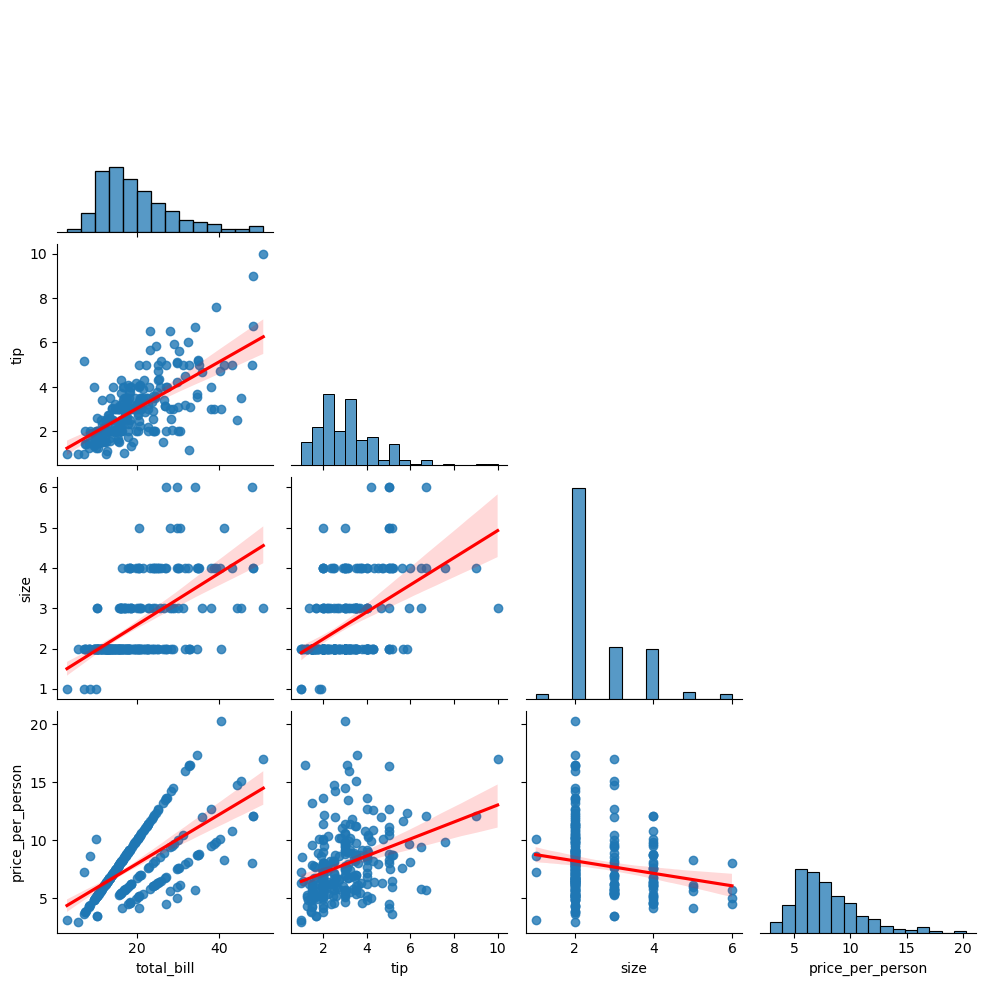

In [155]:
sns.pairplot(data=tips, corner=True, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show();

In [156]:
tips_cont_cols = tips[cont_cols].corr()
tips_cont_cols

,total_bill,tip,size,price_per_person
total_bill,1.000000,0.675734,0.598315,0.647554
tip,0.675734,1.000000,0.489299,0.347405
size,0.598315,0.489299,1.000000,-0.175359
price_per_person,0.647554,0.347405,-0.175359,1.000000


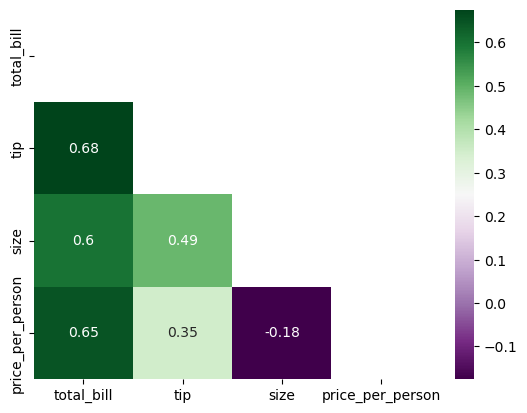

In [157]:
sns.heatmap(data=tips_cont_cols, cmap='PRGn', annot=True, mask=np.triu(tips_cont_cols))
plt.show();

> #### <div class="alert alert-block alert-info"> 1. c. Use Select K Best to select the top 2 features for predicting tip amount. What are they?

In [158]:
tips.isnull().sum()

total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
price_per_person    0
dtype: int64

In [19]:
# Splitting the dataframe
# train, validate, test = wrangle.wrangle_zillow(tips)

In [15]:
# Looking at the shape after the split
# train.shape, validate.shape, test.shape

((146, 8), (49, 8), (49, 8))

In [10]:
# Function transform split df to X and y split to scale: isolating the target column
def split_target(train, validate, test, target):
    '''
    This function takes the split train, validate, test df and a target variable
    Then it returns the X_train, y_train, X_validate, y_validate, X_test, y_test
    and a print statement with the shape of the new dataframes
    
    
    Example target: target = 'tip'
    Input: train, validate, test, target_variable
    Output: X_train, y_train, X_validate, y_validate, X_test, y_test
    '''  
    
    X_train = train.drop(columns = target)
    y_train = train[target]

    X_validate = validate.drop(columns = target)
    y_validate = validate[target]

    X_test = test.drop(columns = target)
    y_test = validate[target]
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [165]:
# encode the categorical variables

# create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# fit the encoder to the categorical variables into one_hot_encoder features
encoder.fit(tips[cat_cols])

# transform the categorical variables from the one_hot_encoder features  
# and rename variable
one_hot_encoded_cat_cols = encoder.transform(tips[cat_cols])

# create new df with one_hot_encoder from categorical features
one_hot_df = pd.DataFrame(one_hot_encoded_cat_cols, columns=encoder.get_feature_names_out
                                                            (['sex', 'smoker', 'day', 'time']))

# concatenate the original df with the one_hot_encoded df
tips = pd.concat([tips, one_hot_df], axis=1)

tips

,total_bill,tip,sex,smoker,day,time,size,price_per_person,sex_Female,sex_Male,...,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [166]:
# drop the original categorical columns from the df
tips = tips.drop(columns=['sex', 'smoker', 'day', 'time'])
tips

,total_bill,tip,size,price_per_person,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,...,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,8.49,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,3,3.45,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,3,7.00,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,2,11.84,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,4,6.15,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,9.68,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,27.18,2.00,2,13.59,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,22.67,2.00,2,11.34,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,17.82,1.75,2,8.91,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [167]:
train, validate, test = wrangle.wrangle_zillow(tips)
train.head(3)

,total_bill,tip,size,price_per_person,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,...,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
36,16.31,2.00,3,5.44,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
217,11.59,1.50,2,5.80,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
63,18.29,3.76,4,4.57,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [178]:
target = 'tip'
X_train, y_train, X_validate, y_validate, X_test, y_test = split_target(train, 
                                                            validate, test, target)

In [204]:
X_train.head(3)

,total_bill,size,price_per_person,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,...,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
36,16.31,3,5.44,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
217,11.59,2,5.80,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
63,18.29,4,4.57,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [212]:
X_train = X_train[['total_bill', 'size', 'price_per_person']]
X_validate = X_validate[['total_bill', 'size', 'price_per_person']]
X_test = X_test[['total_bill', 'size', 'price_per_person']]

In [213]:
# Creating the object
# Using the scaler
scaler = MinMaxScaler()

# Fit the object only on train data set
scaler.fit(X_train)

MinMaxScaler()

In [191]:
# transform data sets
train_scaled = scaler.transform(X_train[['total_bill', 'size', 'price_per_person']])
validate_scaled = scaler.transform(X_validate[['total_bill', 'size', 'price_per_person']])
test_scaled = scaler.transform(X_test[['total_bill', 'size', 'price_per_person']])

In [214]:
train_scaled = scaler.transform(X_train)
validate_scaled = scaler.transform(X_validate)
test_scaled = scaler.transform(X_test)

### > 1.c. Use Select K Best to select the top 2 features for predicting tip amount. What are they?

In [216]:
from sklearn.feature_selection import SelectKBest, f_regression
# Create K Best
kbest = SelectKBest(f_regression, k=2)
kbest

SelectKBest(k=2, score_func=<function f_regression at 0x1664bc720>)

In [217]:
# Fit
kbest.fit(X_train, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x1664bc720>)

In [218]:
# statistical f-value / feature's scores:
kbest.scores_

array([91.43963955, 29.299741  , 25.6600481 ])

In [219]:
# p value:
kbest.pvalues_

array([4.46252410e-17, 2.52960400e-07, 1.22796983e-06])

In [220]:
kbest.n_features_in_

3

In [221]:
feature_mask = kbest.get_support()
X_train.columns[feature_mask]

Index(['total_bill', 'size'], dtype='object')

In [236]:
kbest_results = pd.DataFrame(dict(p_value=kbest.pvalues_, 
                                  feature_score=kbest.scores_, index_col=X_train.columns))
kbest_results

,p_value,feature_score,index_col
0,4.462524e-17,91.439640,total_bill
1,2.529604e-07,29.299741,size
2,1.227970e-06,25.660048,price_per_person


In [245]:
kbest_results = pd.DataFrame(dict(p_value=kbest.pvalues_, feature_score=kbest.scores_), 
                             index=X_train.columns)
kbest_results

,p_value,feature_score
total_bill,4.462524e-17,91.439640
size,2.529604e-07,29.299741
price_per_person,1.227970e-06,25.660048


In [224]:
feature_mask = kbest.get_support()

In [225]:
X_train.columns[feature_mask]

Index(['total_bill', 'size'], dtype='object')

<div class="alert alert-block alert-success"> <b> Takeaways: </b>
    
> * The total_bill is the best feature with the highest feature score

> * The size is the second best feature 

1.d. Use Recursive Feature Elimination to select the top 2 features for tip amount. What are they?

In [227]:
# Creating Algorithm using RFE process
# allowing to recursively reduce the number of features to reach desired goal

# Initialize ML algorithm
lr = LinearRegression()

# Making the thing and the number of feature
rfe = RFE(estimator=lr, n_features_to_select=2)

# Fit the thing with features in train data set
rfe.fit(train_scaled, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [231]:
# Using feature ranking
# Selected feature are assigned rank 1
rfe.ranking_

array([1, 1, 2])

In [232]:
pd.DataFrame({'rfe ranking':rfe.ranking_}, index = X_train.columns)

,rfe ranking
total_bill,1
size,1
price_per_person,2


In [246]:
# Creating variable that takes X_train and turns to rfe features into a list
rfe_columns = X_train.columns[rfe.support_].tolist()

# Calling the column variable
rfe_columns

['total_bill', 'size']

<div class="alert alert-block alert-success"> <b> Takeaways: </b>
    
> Total_bill and Size are the best features with the highest feature score of 1 

1.e. Why do you think Select K Best and Recursive Feature Elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?

<div class="alert alert-block alert-success"> 
    
* <b> SelectKBest </b> may select featuress that could have high individual scores but low features combined with other features

* <b> RFE </b> may select features that have low individual scores but high importance when combined with other features

2. Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [20]:
def select_kbest(X, y, k):
    '''
    This function will take 2 dataframe:
    X: dataframe; Scaled features
    y: dataframe; Scaled target
    k: int; number of features to return (default: 2)
    
    Input: train_scaled, y_train, X_train, k=?
    Output: returns names of the top k selected features.
    '''
    # Create an instance of the SelectBest ML
    kbest = SelectKBest(f_regression, k=k)
    
    # Fit the model algorithm with predictors and target
    kbest.fit(X, y)
    
    # get the indices of the top k selected features
    mask = kbest.get_support(indices=True)
    
    # get the name of the top k selected features
    top_k_feature = X_train.columns[mask].tolist()
    
    return top_k_feature

In [249]:
select_kbest(X_train, y_train, 2)

['total_bill', 'size']

3. Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top n features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [21]:
def rfe(X, y, n=2):
    '''
    This function will take 2 dataframe:
    X: dataframe; Scaled features
    y: dataframe; target variable
    k: int; number of features to return (default: 2)
    
    Input: train_scaled, y_train, X_train, k=?
    Output: returns names of the top k selected features.
    '''
    # Create an instance of the LinearRegression ML
    lr = LinearRegression()
    rfe = RFE(estimator=lr, n_features_to_select = n)
    
    # fit the model algorithm with predictors and target
    rfe.fit(X, y)
    
    # get the indices of the top n selected features
    mask = rfe.get_support()
    
    # get the name of top n selected features
    top_n_feature = X_train.columns[mask].tolist()
    
    return top_n_feature

In [252]:
rfe(train_scaled, y_train, 2)

['total_bill', 'size']

4. Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both Select K Best and Recursive Feature Elimination (use the functions you just built to help you out).

In [2]:
swiss = data('swiss')
swiss.head(3)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2


In [3]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [4]:
env.check_columns(swiss)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,Fertility,46,"[80.2, 83.1, 92.5, 85.8, 76.9, 76.1, 83.8, 92.4, 82.4, 82.9, 87.1, 64.1, 66.9, 68.9, 6...",0,0.0,float64
1,Agriculture,47,"[17.0, 45.1, 39.7, 36.5, 43.5, 35.3, 70.2, 67.8, 53.3, 45.2, 64.5, 62.0, 67.5, 60.7, 6...",0,0.0,float64
2,Examination,22,"[15, 6, 5, 12, 17, 9, 16, 14, 21, 19, 22, 18, 26, 31, 20, 25, 3, 7, 13, 29, 35, 37]",0,0.0,int64
3,Education,19,"[12, 9, 5, 7, 15, 8, 13, 6, 2, 28, 20, 10, 3, 1, 19, 11, 32, 53, 29]",0,0.0,int64
4,Catholic,46,"[9.96, 84.84, 93.4, 33.77, 5.16, 90.57, 92.85, 97.16, 97.67, 91.38, 98.61, 8.52, 2.27,...",0,0.0,float64
5,Infant.Mortality,37,"[22.2, 20.2, 20.3, 20.6, 26.6, 23.6, 24.9, 21.0, 24.4, 24.5, 16.5, 19.1, 22.7, 18.7, 2...",0,0.0,float64


In [5]:
swiss_corr = swiss.corr()
swiss_corr

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


In [8]:
train, validate, test = wrangle.wrangle_zillow(swiss)

In [11]:
target = 'Fertility'
X_train, y_train, X_validate, y_validate, X_test, y_test = split_target(train, validate,
                                                            test, target)

In [12]:
X_train.head(3)

,Agriculture,Examination,Education,Catholic,Infant.Mortality
La Chauxdfnd,7.7,29,11,13.79,20.5
Glane,67.8,14,8,97.16,24.9
Morges,59.8,22,10,5.23,18.0


In [18]:
y_train.head(3)

La Chauxdfnd    65.7
Glane           92.4
Morges          65.5
Name: Fertility, dtype: float64

In [33]:
columns_to_scale = ['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']
train_scaled, validate_scaled, test_scaled = feature_engineering.scaled_version(X_train, 
                                            X_validate, X_test, scaler=RobustScaler(), 
                                            columns_to_scale=columns_to_scale)

In [34]:
train_scaled.head()

,Agriculture,Examination,Education,Catholic,Infant.Mortality
La Chauxdfnd,-1.215361,1.351351,0.24,-0.025244,0.166667
Glane,0.594880,-0.270270,-0.24,0.914295,2.000000
Morges,0.353916,0.594595,0.08,-0.121711,-0.875000
Rive Gauche,-0.612952,0.594595,3.12,0.476700,-0.333333
Moutier,-0.347892,-0.486486,-0.40,0.199921,0.083333


In [35]:
select_kbest(train_scaled, y_train, 3)

['Examination', 'Education', 'Catholic']

In [23]:
rfe(X_train, y_train, 3)

['Examination', 'Education', 'Infant.Mortality']

In [24]:
train_scaled, validate_scaled, test_scaled = feature_engineering.scaled_version(train, 
                                            validate, test, scaler=MinMaxScaler(), 
                                            columns_to_scale=columns_to_scale)

In [36]:
select_kbest(X_train, y_train, 3)

['Examination', 'Education', 'Catholic']

In [37]:
rfe(X_train, y_train, 3)

['Examination', 'Education', 'Infant.Mortality']